In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load Dataset
df = pd.read_csv("cirrhosis.csv")

In [5]:
# Display first few rows
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [7]:
# Drop ID column since it's not useful for modeling
df.drop(columns=['id'], inplace=True)

In [8]:
# Convert Age from days to years
df['Age'] = df['Age'] / 365

In [10]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,58.991781,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,52.704110,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,37.608219,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,50.575342,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,45.638356,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [11]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   float64
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [12]:
# Statistical summary
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,50.337388,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,1094.233744,10.082079,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,41.000000,26.295890,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,42.668493,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,51.268493,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,56.668493,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,78.493151,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [13]:
# Exploratory Data Analysis (EDA) - Categorical Columns vs Stage

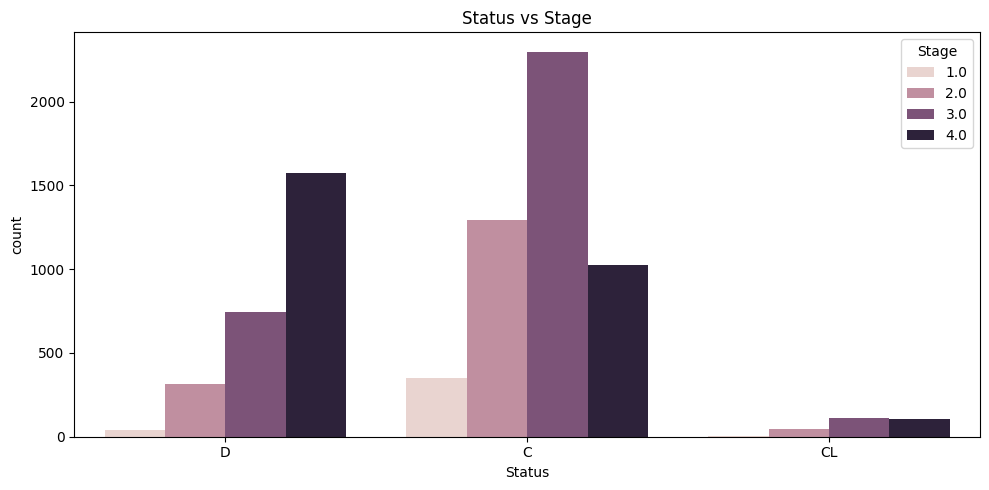

In [14]:
# Status vs Stage
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Status'], hue='Stage', data=df)
plt.title("Status vs Stage")
plt.tight_layout()
plt.show()

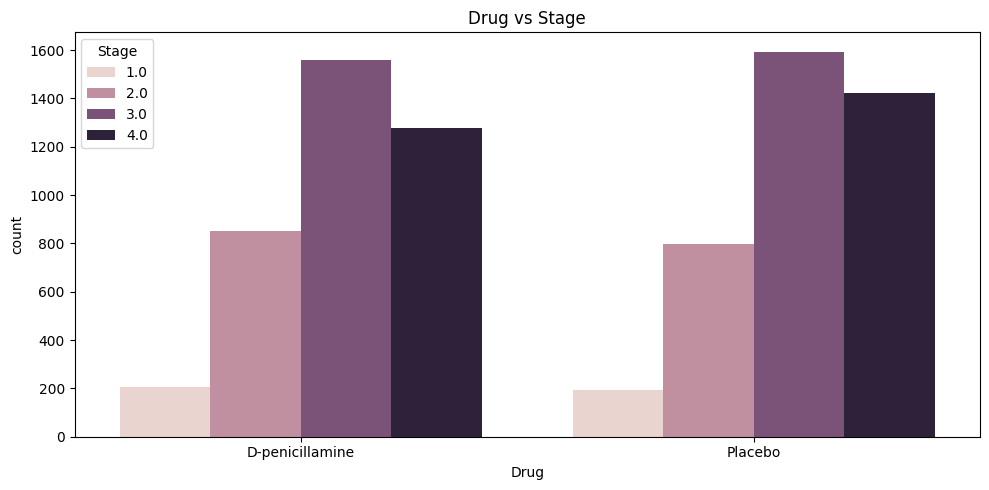

In [15]:
# Drug vs Stage
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Drug'], hue='Stage', data=df)
plt.title("Drug vs Stage")
plt.tight_layout()
plt.show()

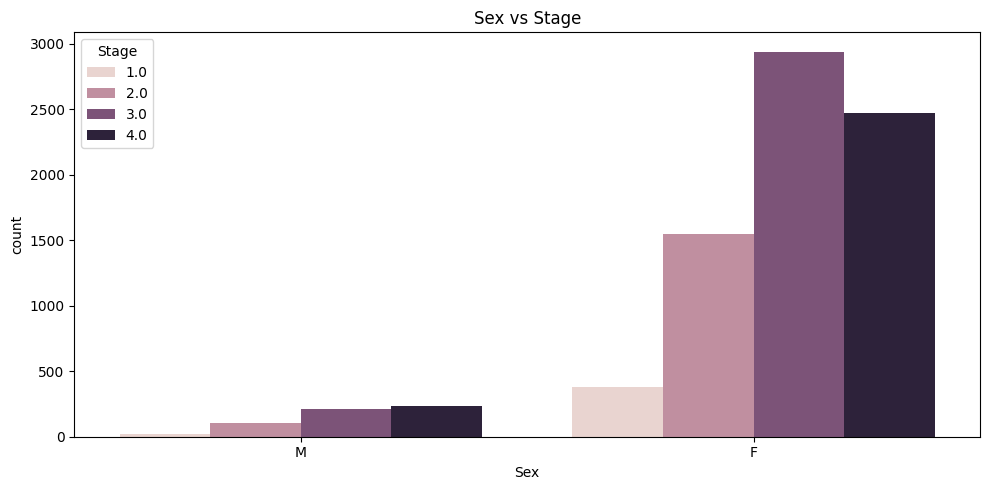

In [16]:
# Sex vs Stage
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Sex'], hue='Stage', data=df)
plt.title("Sex vs Stage")
plt.tight_layout()
plt.show()

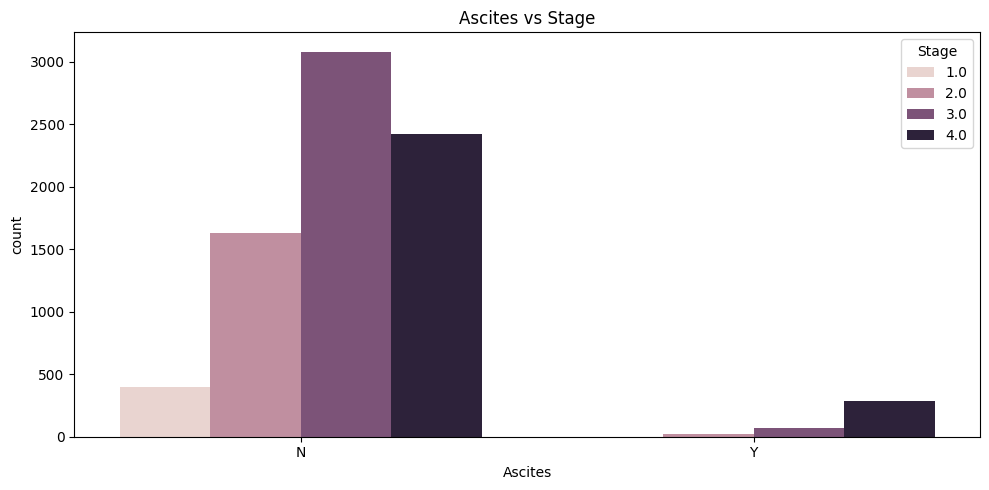

In [17]:
# Ascites vs Stage
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Ascites'], hue='Stage', data=df)
plt.title("Ascites vs Stage")
plt.tight_layout()
plt.show()

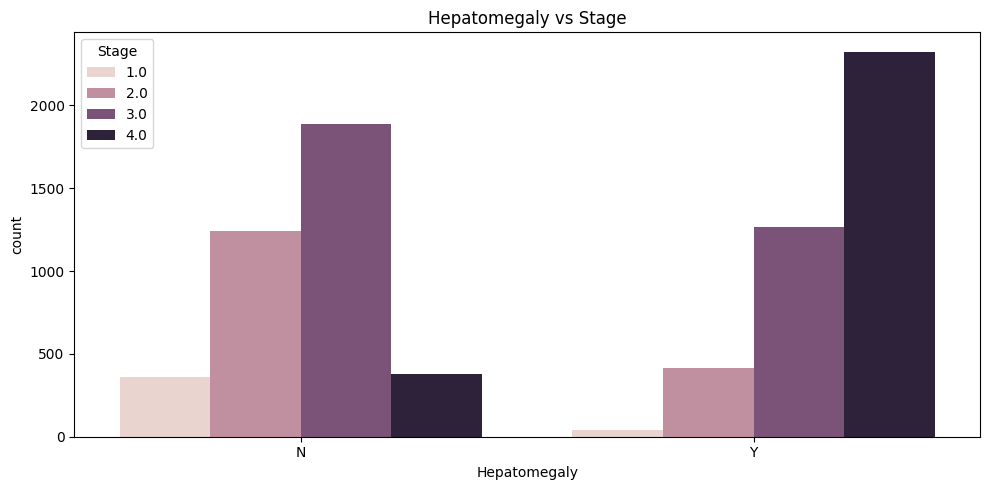

In [18]:
# Hepatomegaly vs Stage
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Hepatomegaly'], hue='Stage', data=df)
plt.title("Hepatomegaly vs Stage")
plt.tight_layout()
plt.show()

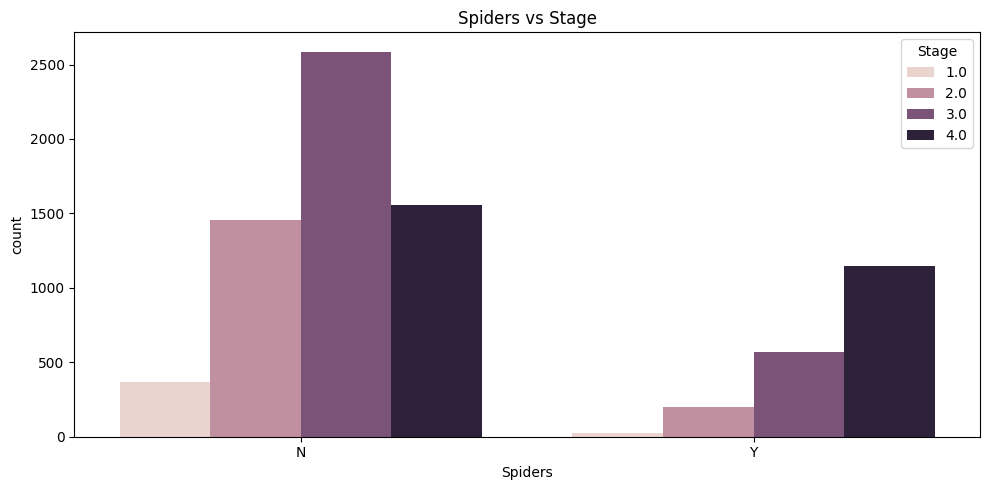

In [19]:
# Spiders vs Stage
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Spiders'], hue='Stage', data=df)
plt.title("Spiders vs Stage")
plt.tight_layout()
plt.show()

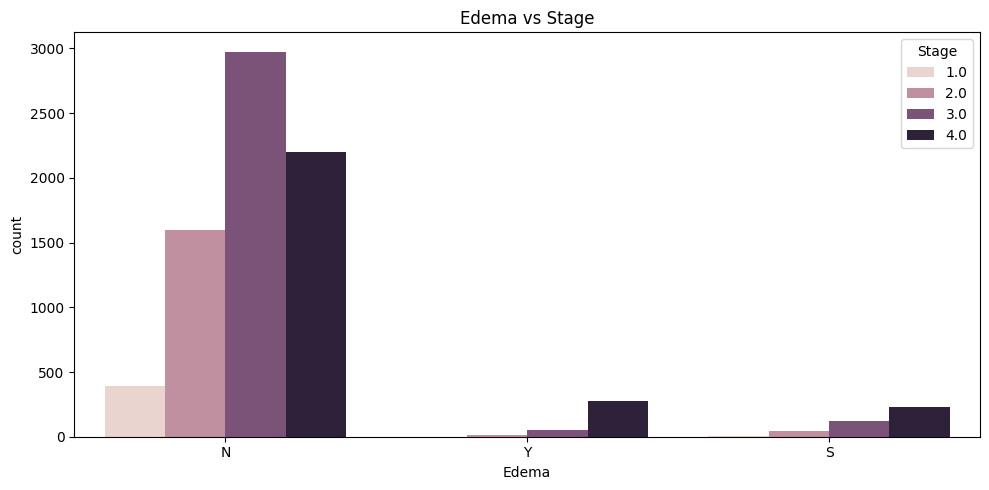

In [20]:
# Edema vs Stage
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Edema'], hue='Stage', data=df)
plt.title("Edema vs Stage")
plt.tight_layout()
plt.show()

In [21]:
# Missing values
df.isnull().sum()

,0
N_Days,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0
Cholesterol,0


In [22]:
# Handle missing values by filling with median (for numeric) or mode (for categorical)
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical column
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # Numeric column
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-22-3877cdefd541>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-22-3877cdefd541>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [23]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [24]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later decoding

In [25]:
# Define X (features) and y (target)
X = df.drop(columns=['Stage'])  # Features
y = df['Stage']  # Target variable

In [26]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Train models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [29]:
# Evaluate models
best_model = None
best_accuracy = 0
results = {}

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Fit the LabelEncoder on the target variable and transform it
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Transform y_test using the same encoder

for name, model in models.items():
    # Use the encoded target variable for training
    if name == "XGBoost":  # Apply encoding only for XGBoost
        model.fit(X_train, y_train_encoded)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Use the original y_test for evaluation
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model


Model: Random Forest
Accuracy: 0.5515
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        91
         2.0       0.31      0.18      0.22       305
         3.0       0.54      0.64      0.59       662
         4.0       0.64      0.75      0.69       523

    accuracy                           0.55      1581
   macro avg       0.37      0.39      0.38      1581
weighted avg       0.50      0.55      0.52      1581

Confusion Matrix:
[[  0  17  65   9]
 [  2  54 190  59]
 [  1  85 425 151]
 [  0  21 109 393]]

Model: Gradient Boost
Accuracy: 0.5629
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        91
         2.0       0.33      0.11      0.16       305
         3.0       0.53      0.68      0.60       662
         4.0       0.65      0.78      0.71       523

    accuracy                           0.56      1581
   macro avg       

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.2144
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.06      0.16      0.09        91
         2.0       0.23      0.56      0.33       305
         3.0       0.25      0.23      0.24       662
         4.0       0.00      0.00      0.00       523

    accuracy                           0.21      1581
   macro avg       0.11      0.19      0.13      1581
weighted avg       0.15      0.21      0.17      1581

Confusion Matrix:
[[  0   0   0   0   0]
 [  2  15  68   6   0]
 [  4  78 171  52   0]
 [  2 117 390 153   0]
 [  0  24 102 397   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [30]:
# Display model performance comparison
print("\nModel Performance Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

print(f"\nBest Model Selected: {best_model.__class__.__name__} with accuracy {best_accuracy:.4f}")


Model Performance Comparison:
Random Forest: 0.5515
Gradient Boost: 0.5629
XGBoost: 0.2144

Best Model Selected: GradientBoostingClassifier with accuracy 0.5629


In [31]:
# Function for user input prediction
def predict_liver_cirrhosis():
    print("\nEnter patient details for prediction:")

    user_data = {}
    for col in X.columns:
        if col in categorical_cols:
            user_input = input(f"Enter {col} ({', '.join(map(str, label_encoders[col].classes_))}): ")
            user_data[col] = label_encoders[col].transform([user_input])[0]
        elif col == "Age":
            user_data[col] = float(input(f"Enter {col} (in years): "))
        else:
            user_data[col] = float(input(f"Enter {col}: "))

    # Convert to DataFrame
    user_df = pd.DataFrame([user_data])

    # Scale numerical features
    user_df = scaler.transform(user_df)

    # Make prediction
    prediction = best_model.predict(user_df)

    print(f"\nPredicted Disease Stage: {prediction[0]}")

# Call function to get user input and predict
predict_liver_cirrhosis()


Enter patient details for prediction:
Enter N_Days: 400
Enter Drug (D-penicillamine, Placebo): Placebo
Enter Age (in years): 24
Enter Sex (F, M): M
Enter Ascites (N, Y): Y
Enter Hepatomegaly (N, Y): Y
Enter Spiders (N, Y): Y
Enter Edema (N, S, Y): N
Enter Bilirubin: 14
Enter Cholesterol: 261
Enter Albumin: 3
Enter Copper: 150
Enter Alk_Phos: 1700
Enter SGOT: 137
Enter Tryglicerides: 172
Enter Platelets: 190
Enter Prothrombin: 12
Enter Status (C, CL, D): D

Predicted Disease Stage: 4.0
